<a href="https://colab.research.google.com/github/PaulToronto/DataCamp_TimeSeries/blob/main/01_Working_with_Time_Series_in_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Working with Time Series in Pandas

This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

## Imports and `data_path`

In [1]:
data_path = 'https://raw.githubusercontent.com/PaulToronto/'
data_path += 'DataCamp_TimeSeries/main/stock_data/'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

## How to use dates & times with pandas

### `pd.Timestamp`

In [3]:
date_time = datetime(2017, 1, 1)
type(date_time), date_time

(datetime.datetime, datetime.datetime(2017, 1, 1, 0, 0))

In [4]:
time_stamp = pd.Timestamp(date_time)
type(time_stamp), time_stamp

(pandas._libs.tslibs.timestamps.Timestamp, Timestamp('2017-01-01 00:00:00'))

In [5]:
pd.Timestamp('2017-04-03')

Timestamp('2017-04-03 00:00:00')

In [6]:
time_stamp.year, time_stamp.day_name(), time_stamp.dayofweek

(2017, 'Sunday', 6)

### `pd.Period`

In [7]:
period = pd.Period(value='2017-01') # default freq is 'M'

In [8]:
period

Period('2017-01', 'M')

In [9]:
period.asfreq('D')

Period('2017-01-31', 'D')

In [10]:
period.to_timestamp()

Timestamp('2017-01-01 00:00:00')

In [11]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [12]:
period, period + 2

(Period('2017-01', 'M'), Period('2017-03', 'M'))

In [13]:
pd.Timestamp('2017-01-31') + pd.Timedelta(1, unit='D')

Timestamp('2017-02-01 00:00:00')

### `pd.date_range`

In [14]:
index = pd.date_range(start='2017-1-1', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [16]:
index.dtype, index.to_period().dtype

(dtype('<M8[ns]'), period[M])

In [17]:
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [18]:
pd.DataFrame({'data': index})

,data
0,2017-01-31
1,2017-02-28
2,2017-03-31
3,2017-04-30
4,2017-05-31
5,2017-06-30
6,2017-07-31
7,2017-08-31
8,2017-09-30
9,2017-10-31


In [19]:
data = np.random.random(size=(12,2))
data

array([[0.53943111, 0.94517792],
       [0.82909844, 0.05758974],
       [0.64403545, 0.57400784],
       [0.77689743, 0.25866581],
       [0.89649593, 0.60123434],
       [0.76110405, 0.39325177],
       [0.93928178, 0.85602124],
       [0.05029908, 0.4513495 ],
       [0.15570672, 0.57646189],
       [0.54804572, 0.34958556],
       [0.06086718, 0.85053446],
       [0.30369706, 0.02567437]])

In [20]:
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [21]:
pd.DataFrame(data=data, index=index)

,0,1
2017-01-31,0.539431,0.945178
2017-02-28,0.829098,0.057590
2017-03-31,0.644035,0.574008
2017-04-30,0.776897,0.258666
2017-05-31,0.896496,0.601234
2017-06-30,0.761104,0.393252
2017-07-31,0.939282,0.856021
2017-08-31,0.050299,0.451350
2017-09-30,0.155707,0.576462
2017-10-31,0.548046,0.349586


### Frequency aliases

- H: Hour
- D: Day
- W: Week
- M: Month
- Q: Quarter
- Y: Year

### Timestamp attributes

- .second, .minute, .hour
- .day, .month, .quarter, .year
- .weekday
- .dayofweek
- .weekofyear
- .dayofyear

### Exercises

In [22]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7)
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

In [23]:
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

In [24]:
google = pd.read_csv(data_path + 'goog_fb.csv')
google = google[['date', 'GOOG']]
google.columns = ['date', 'price']
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   price   504 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [25]:
# convert date column, which is an object to datatime64[ns]
google['date'] = pd.to_datetime(google['date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   price   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


In [26]:
google.set_index('date', inplace=True)
google.head()

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68


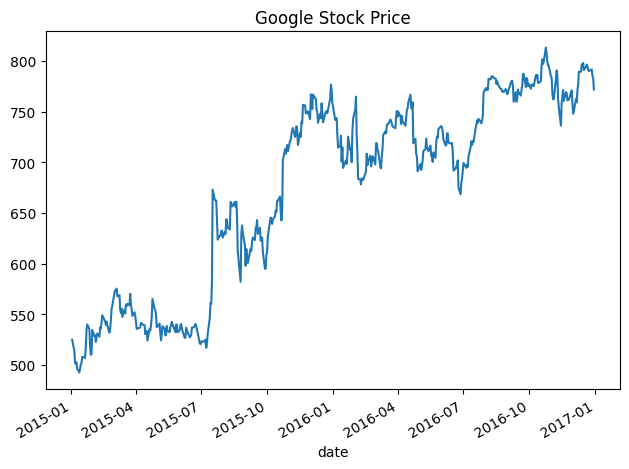

In [27]:
google['price'].plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

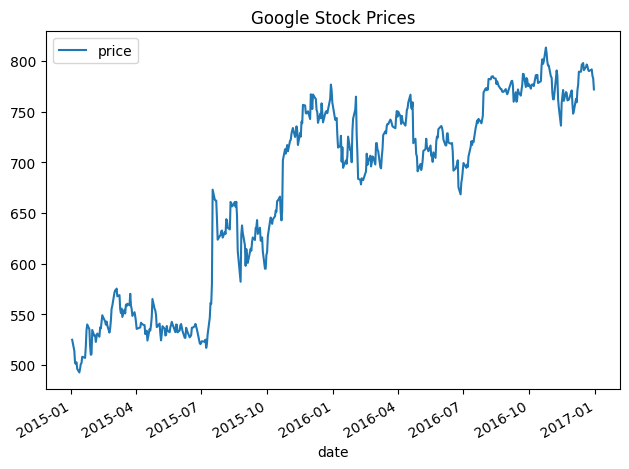

In [28]:
google.plot(title='Google Stock Prices')
plt.tight_layout()
plt.show()

### Partial string indexing

In [29]:
google.loc['2015']

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
...,...
2015-12-24,748.40
2015-12-28,762.51
2015-12-29,776.60


In [30]:
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [31]:
google.loc['2015':'2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [32]:
google['2015':'2016'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [33]:
google['2015-3':'2016-2']

,price
date,
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33
2015-03-06,567.68
...,...
2016-02-23,695.85
2016-02-24,699.56
2016-02-25,705.75


In [34]:
google.loc['2016',['price']]

,price
date,
2016-01-04,741.84
2016-01-05,742.58
2016-01-06,743.62
2016-01-07,726.39
2016-01-08,714.47
...,...
2016-12-23,789.91
2016-12-27,791.55
2016-12-28,785.05


In [35]:
google.loc['2016-6-1','price']

734.15

### `.asfreq()`: set frequency

- **Upsampling**
  - higher freqeuncy than the origianl version
  - implies missing data

In [36]:
google.head(12)

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
2015-01-09,496.17
2015-01-12,492.55
2015-01-13,496.18
2015-01-14,500.87


In [37]:
# note there is no frequency information
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 24.0 KB


In [38]:
google.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2015-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [39]:
# this is an example of upsampling
google.asfreq('D').head(12) # calendar day frequency

,price
date,
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68
2015-01-09,496.17
2015-01-10,NaN


In [40]:
# business day frequency
google = google.asfreq('B')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2015-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   504 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [41]:
# business days with null values for price
google[google['price'].isnull()]

,price
date,
2015-01-19,NaN
2015-02-16,NaN
2015-04-03,NaN
2015-05-25,NaN
2015-07-03,NaN
2015-09-07,NaN
2015-11-26,NaN
2015-12-25,NaN
2016-01-01,NaN


### Exercises

In [42]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/DataCamp_TimeSeries/main/'
file_path += 'air_quality_data/nyc.csv'

In [43]:
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


In [44]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6317 non-null   datetime64[ns]
 1   ozone   6317 non-null   float64       
 2   pm25    6317 non-null   float64       
 3   co      6317 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 197.5 KB


In [45]:
data.set_index('date', inplace=True)
data.head()

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


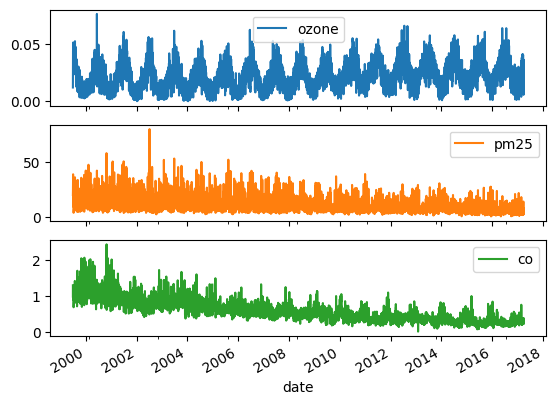

In [46]:
data.plot(subplots=True);

In [47]:
yahoo = pd.read_csv(data_path + 'yahoo.csv', parse_dates=['date'], index_col='date')
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2013-01-02 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [48]:
prices = pd.DataFrame()
prices

""


In [49]:
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59
...,...,...,...
256,40.65,NaN,NaN
257,40.49,50.86,33.60
258,40.20,50.53,34.04
259,40.44,51.22,33.37


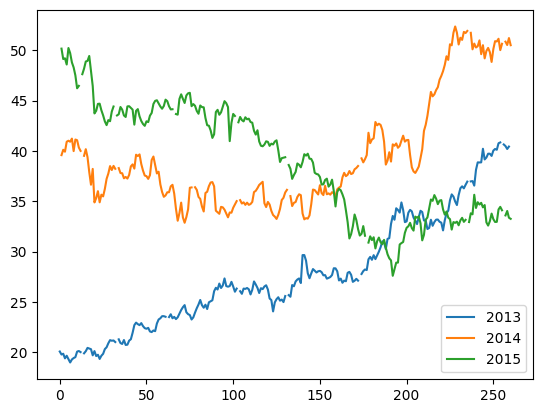

In [50]:
prices.plot()
plt.show()

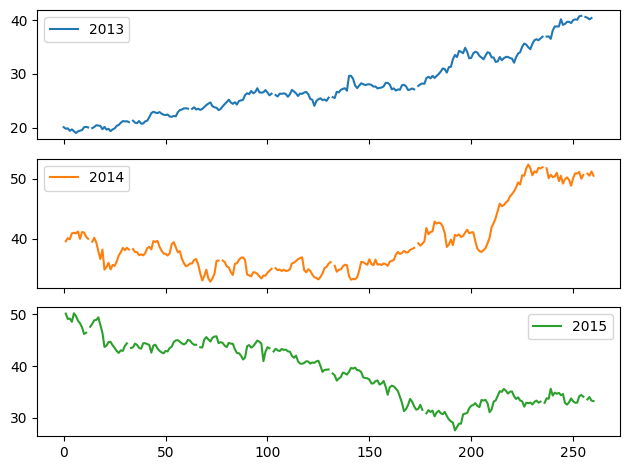

In [51]:
prices.plot(subplots=True)
plt.tight_layout()
plt.show()

In [52]:
file_path = 'https://raw.githubusercontent.com/PaulToronto/DataCamp_TimeSeries/main/'
file_path += 'air_quality_data/co_cities.csv'

co = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB


In [53]:
co

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761
...,...,...,...
2010-12-27,0.510417,0.669384,0.414583
2010-12-28,0.479166,0.669129,0.425278
2010-12-29,0.460417,0.291757,0.400924


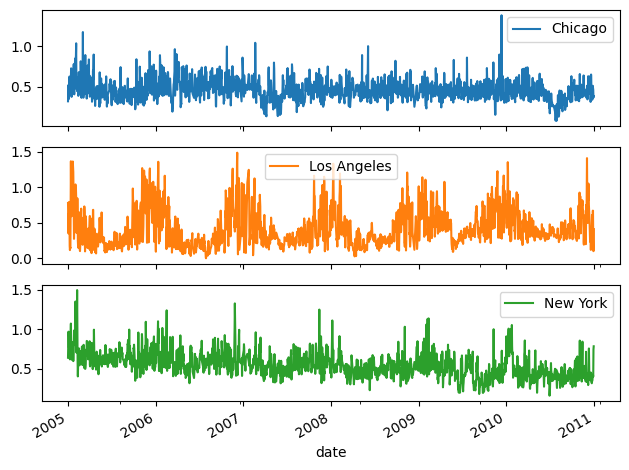

In [54]:
co.plot(subplots=True)
plt.tight_layout()
plt.show()

In [55]:
co = co.asfreq('D')
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2005-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 68.5 KB


In [56]:
len(co) - 1898, co['Chicago'].isnull().sum(), (co.index.max() - co.index.min()).days - 1898 + 1

(293, 293, 293)

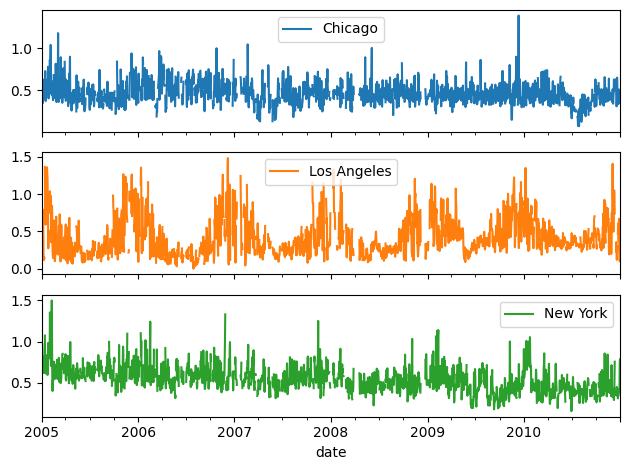

In [57]:
co.plot(subplots=True)
plt.tight_layout()
plt.show()

In [58]:
co = co.asfreq('M')
co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


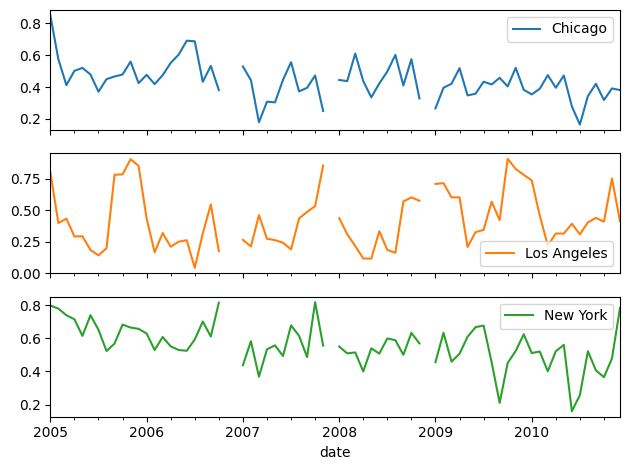

In [59]:
co.plot(subplots=True)
plt.tight_layout()
plt.show()

## Lags, changes, and returns for stock price series

- Typical Time Series manipulations include:
  - Shift or lag values back or forward in time
  - Get the difference in value for a given time period
  - Compute the percentage change over any number of periods

In [60]:
pd.read_csv(data_path + 'goog_fb.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    504 non-null    object 
 1   FB      504 non-null    float64
 2   GOOG    504 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


In [61]:
pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   FB      504 non-null    float64       
 2   GOOG    504 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.9 KB


In [62]:
pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date'], index_col='date').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


In [63]:
google = pd.read_csv(data_path + 'goog_fb.csv', parse_dates=['date'], index_col='date')
google = google[['GOOG']]
google.columns = ['price']
google.head()

,price
date,
2015-01-02,524.81
2015-01-05,513.87
2015-01-06,501.96
2015-01-07,501.10
2015-01-08,502.68


### `.shift()`

In [64]:
google['shifted'] = google['price'].shift() # default: periods=1
google['lagged'] = google['price'].shift(-1)

In [65]:
google.head()

,price,shifted,lagged
date,,,
2015-01-02,524.81,NaN,513.87
2015-01-05,513.87,524.81,501.96
2015-01-06,501.96,513.87,501.10
2015-01-07,501.10,501.96,502.68
2015-01-08,502.68,501.10,496.17


In [66]:
google.tail()

,price,shifted,lagged
date,,,
2016-12-23,789.91,791.26,791.55
2016-12-27,791.55,789.91,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


### Calculate one-period percent change

- this is called **financial return** in finance

$$
\frac{x_t}{x_{t-1}}
$$

In [67]:
google['change'] = google['price'].div(google['shifted'])
google.head()

,price,shifted,lagged,change
date,,,,
2015-01-02,524.81,NaN,513.87,NaN
2015-01-05,513.87,524.81,501.96,0.979154
2015-01-06,501.96,513.87,501.10,0.976823
2015-01-07,501.10,501.96,502.68,0.998287
2015-01-08,502.68,501.10,496.17,1.003153


In [68]:
google['return'] = google['change'].sub(1).mul(100)
google.head()

,price,shifted,lagged,change,return
date,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328
2015-01-08,502.68,501.10,496.17,1.003153,0.315306


### `.diff()`

- Difference in value for two adjacent periods
- also has periods where default is 1

$$
x_t - x_{t-1}
$$

In [69]:
google['diff'] = google['price'].diff()
google['diff_check'] = google['price'] - google['shifted']
google.head()

,price,shifted,lagged,change,return,diff,diff_check
date,,,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564,-10.94,-10.94
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707,-11.91,-11.91
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328,-0.86,-0.86
2015-01-08,502.68,501.10,496.17,1.003153,0.315306,1.58,1.58


### `.pct_change()`

- calculates the percent change directly

$$
\frac{x_t}{x_{t-1}}
$$

In [70]:
google['pct_change'] = google['price'].pct_change().mul(100)
google.head()

,price,shifted,lagged,change,return,diff,diff_check,pct_change
date,,,,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN,NaN,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564,-10.94,-10.94,-2.084564
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707,-11.91,-11.91,-2.317707
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328,-0.86,-0.86,-0.171328
2015-01-08,502.68,501.10,496.17,1.003153,0.315306,1.58,1.58,0.315306


In [71]:
# all these methods have a period parameter
google['return_3'] = google['price'].pct_change(periods=3).mul(100)
google.head()

,price,shifted,lagged,change,return,diff,diff_check,pct_change,return_3
date,,,,,,,,,
2015-01-02,524.81,NaN,513.87,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,513.87,524.81,501.96,0.979154,-2.084564,-10.94,-10.94,-2.084564,NaN
2015-01-06,501.96,513.87,501.10,0.976823,-2.317707,-11.91,-11.91,-2.317707,NaN
2015-01-07,501.10,501.96,502.68,0.998287,-0.171328,-0.86,-0.86,-0.171328,-4.517825
2015-01-08,502.68,501.10,496.17,1.003153,0.315306,1.58,1.58,0.315306,-2.177594


### Exercises

In [72]:
google = pd.read_csv(data_path + 'google.csv',
                     parse_dates=['Date'],
                     index_col='Date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [73]:
google.index.day_name()

Index(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='Date', length=1094)

In [74]:
google = google.asfreq('B')
google.index.day_name()

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Wednesday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='Date', length=782)

In [75]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [76]:
google['shifted'] = google['Close'].shift(90)
google['lagged'] = google['Close'].shift(-90)
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,511.00
2014-01-03,551.95,NaN,518.73
2014-01-06,558.10,NaN,529.92
2014-01-07,568.86,NaN,533.09
2014-01-08,570.04,NaN,526.65


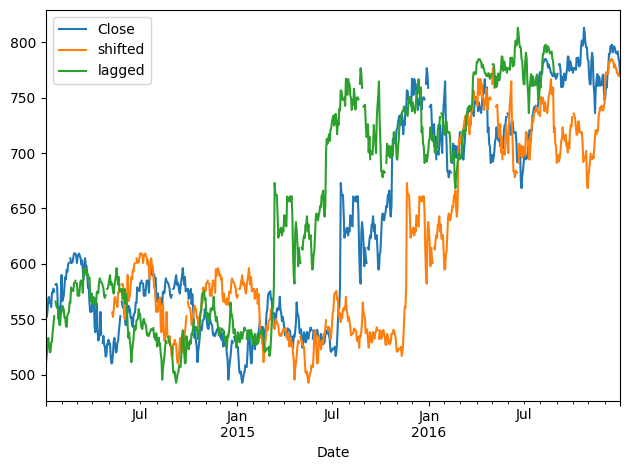

In [77]:
google.plot()
plt.tight_layout()
plt.show()

In [78]:
yahoo

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66
...,...
2015-12-25,NaN
2015-12-28,33.60
2015-12-29,34.04


In [79]:
yahoo['shifted_30'] = yahoo['price'].shift(30)
yahoo['change_30'] = yahoo['price'].sub(yahoo['shifted_30'])
yahoo['diff_30'] = yahoo['price'].diff(30)
yahoo

,price,shifted_30,change_30,diff_30
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,NaN,NaN,NaN
2013-01-04,19.86,NaN,NaN,NaN
2013-01-07,19.40,NaN,NaN,NaN
2013-01-08,19.66,NaN,NaN,NaN
...,...,...,...,...
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18


In [80]:
yahoo['change_30'].sub(yahoo['diff_30']).value_counts()

0.0    703
dtype: int64

In [81]:
google = pd.read_csv(data_path + 'google.csv',
                     parse_dates=['Date'],
                     index_col='Date')
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [82]:
google['daily_return'] = google['Close'].pct_change().mul(100)
google['monthly_return'] = google['Close'].pct_change(periods=30).mul(100)
google['annual_return'] = google['Close'].pct_change(periods=360).mul(100)
google

,Close,daily_return,monthly_return,annual_return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,-0.728417,NaN,NaN
2014-01-04,NaN,0.000000,NaN,NaN
2014-01-05,NaN,0.000000,NaN,NaN
2014-01-06,558.10,1.114231,NaN,NaN
...,...,...,...,...
2016-12-26,NaN,0.000000,3.706281,4.088921
2016-12-27,791.55,0.207619,3.921594,4.305028
2016-12-28,785.05,-0.821174,2.188118,3.448503


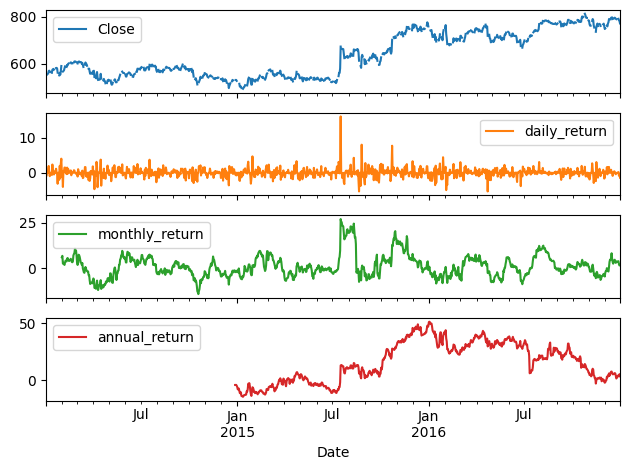

In [83]:
google.plot(subplots=True)
plt.tight_layout()
plt.show()